In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [11]:
df['Total score'] = df['math score']+ df['reading score']+ df['writing score']

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [13]:
df['Average'] = df['Total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
math_full = df[df['math score'] == 100]['Average'].count()
reading_full = df[df['reading score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()

print(f'Students with full marks in math: {math_full}')
print(f'Students with full marks in reading: {reading_full}')
print(f'Students with full marks in writing: {writing_full}')

Students with full marks in math: 7
Students with full marks in reading: 17
Students with full marks in writing: 14


In [15]:
math_less_20 = df[df['math score'] <= 20]['Average'].count()
reading_less_20 = df[df['reading score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average'].count()

print(f'Students with marks less than 20 in math: {math_less_20}')
print(f'Students with marks less than 20 in reading: {reading_less_20}')
print(f'Students with marks less than 20 in writing: {writing_less_20}')

Students with marks less than 20 in math: 4
Students with marks less than 20 in reading: 1
Students with marks less than 20 in writing: 3


<Axes: xlabel='Average', ylabel='Count'>

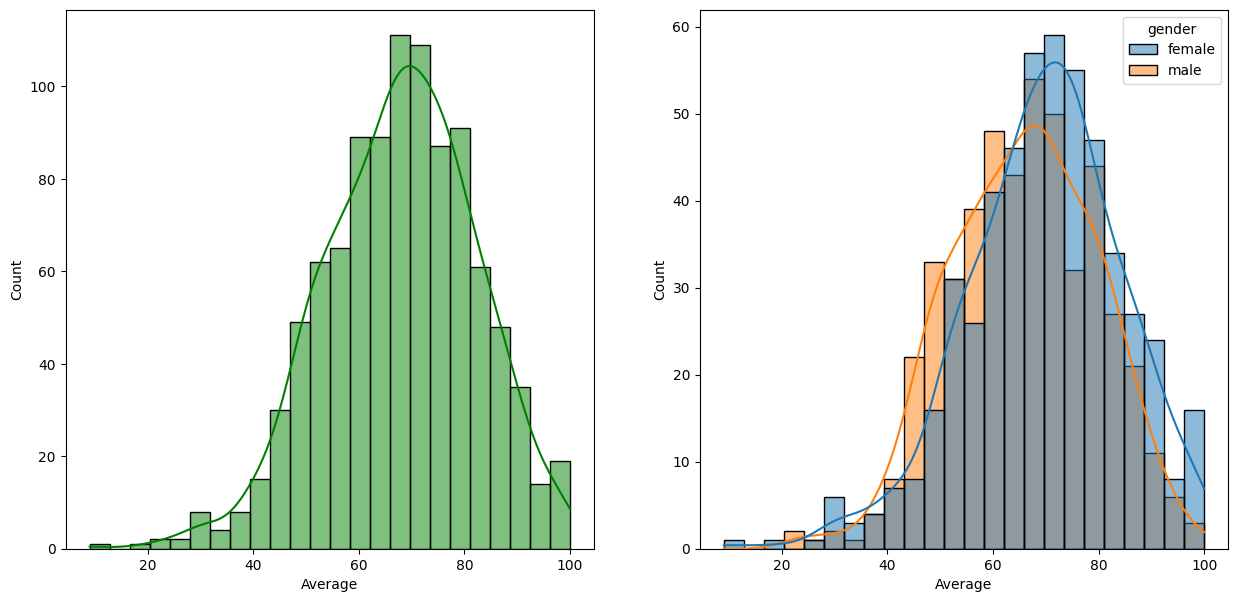

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average', kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')

<Axes: xlabel='Total score', ylabel='Count'>

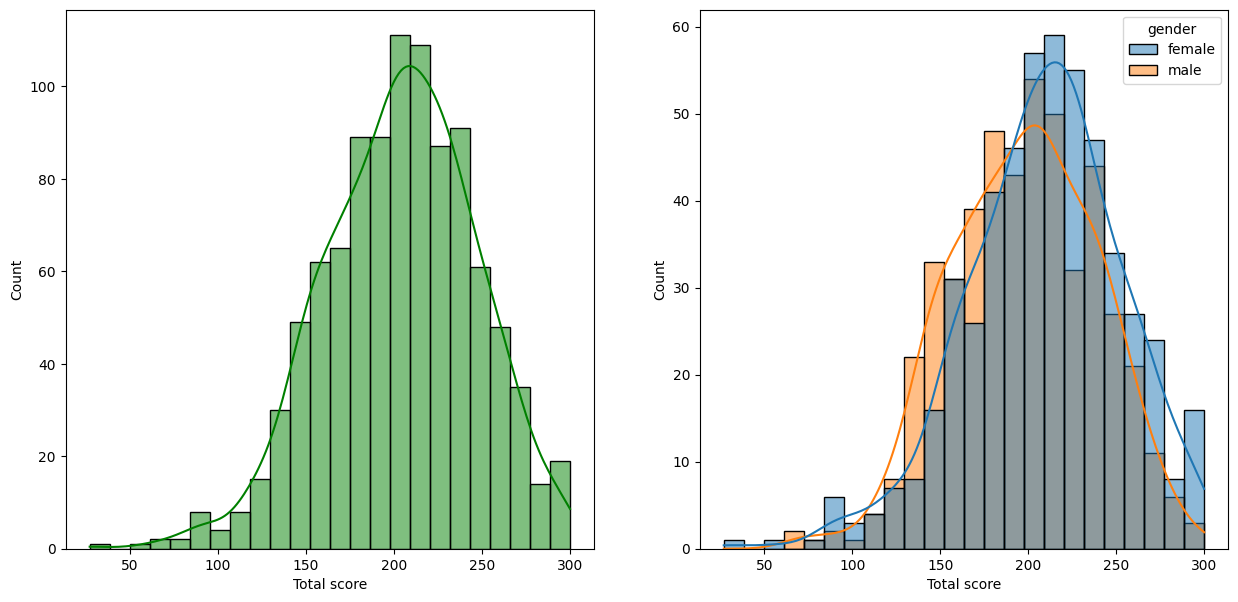

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Total score', kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df, x='Total score', kde=True, hue='gender')

<Axes: xlabel='Average', ylabel='Count'>

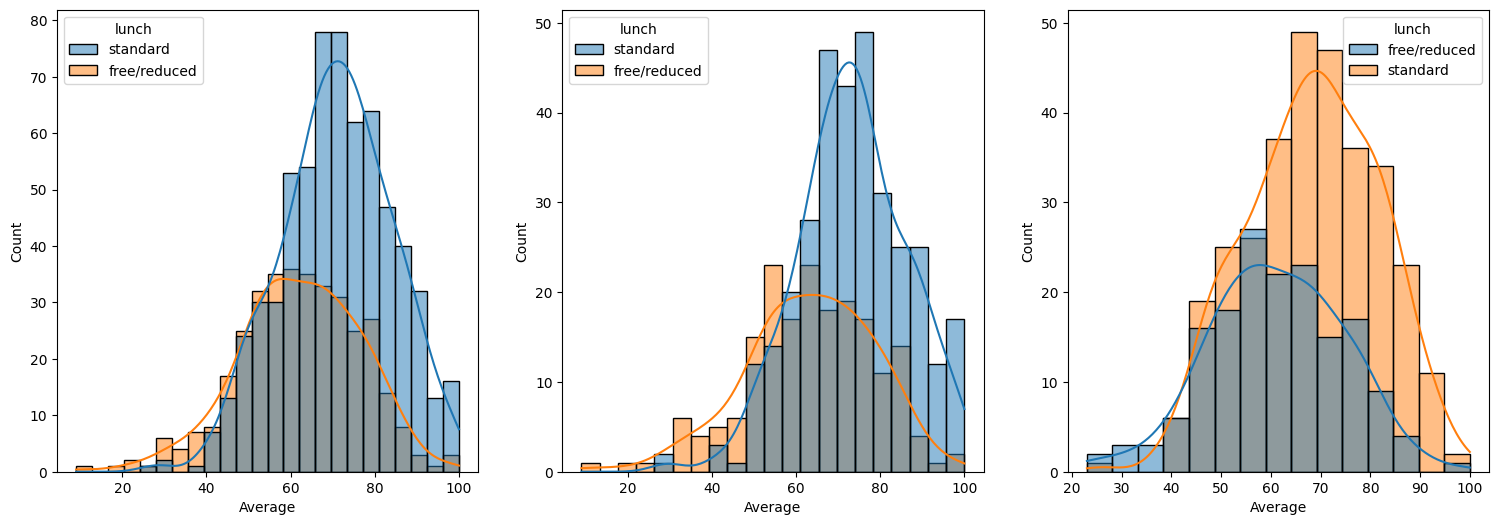

In [18]:
plt.subplots(1,3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde = True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde = True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde = True, hue='lunch')

<Axes: xlabel='Average', ylabel='Count'>

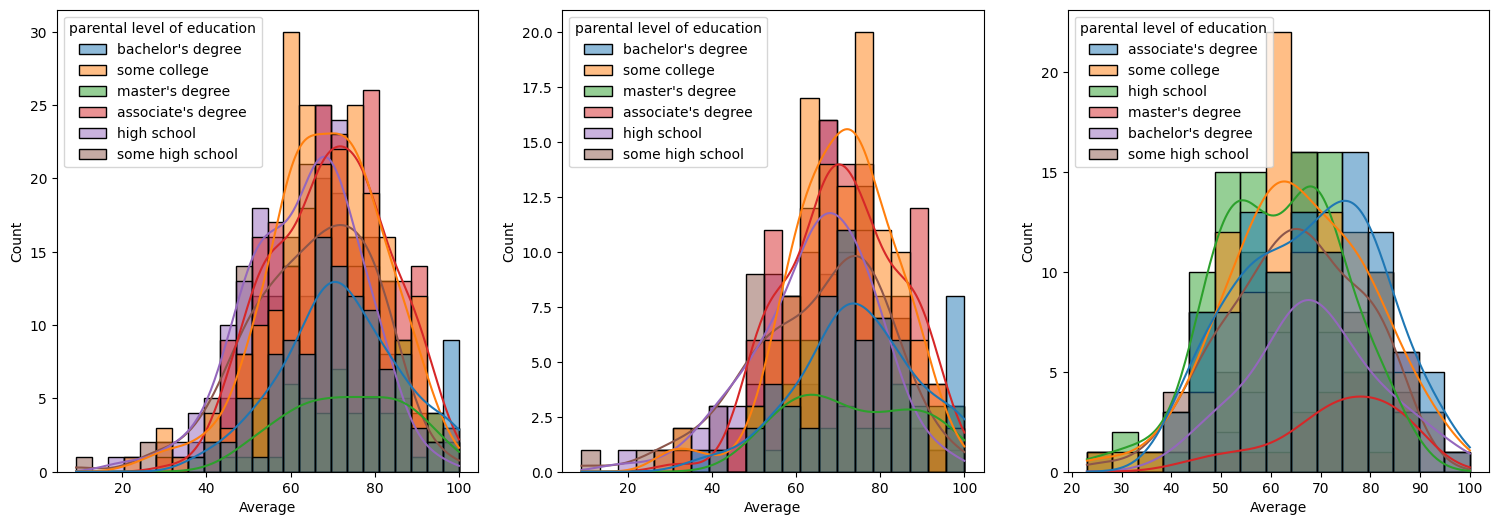

In [19]:
plt.subplots(1,3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde = True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde = True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde = True, hue='parental level of education')

<Axes: xlabel='Average', ylabel='Count'>

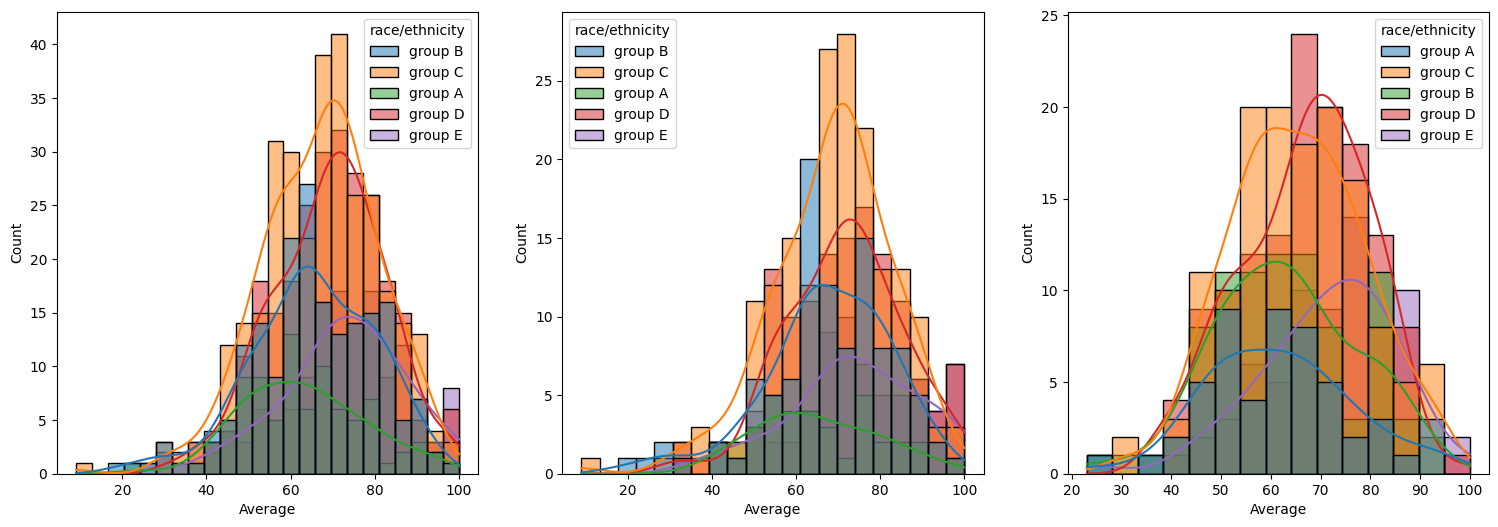

In [20]:
plt.subplots(1,3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde = True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde = True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde = True, hue='race/ethnicity')

<Axes: title={'center': 'WRITING SCORES'}, xlabel='writing score'>

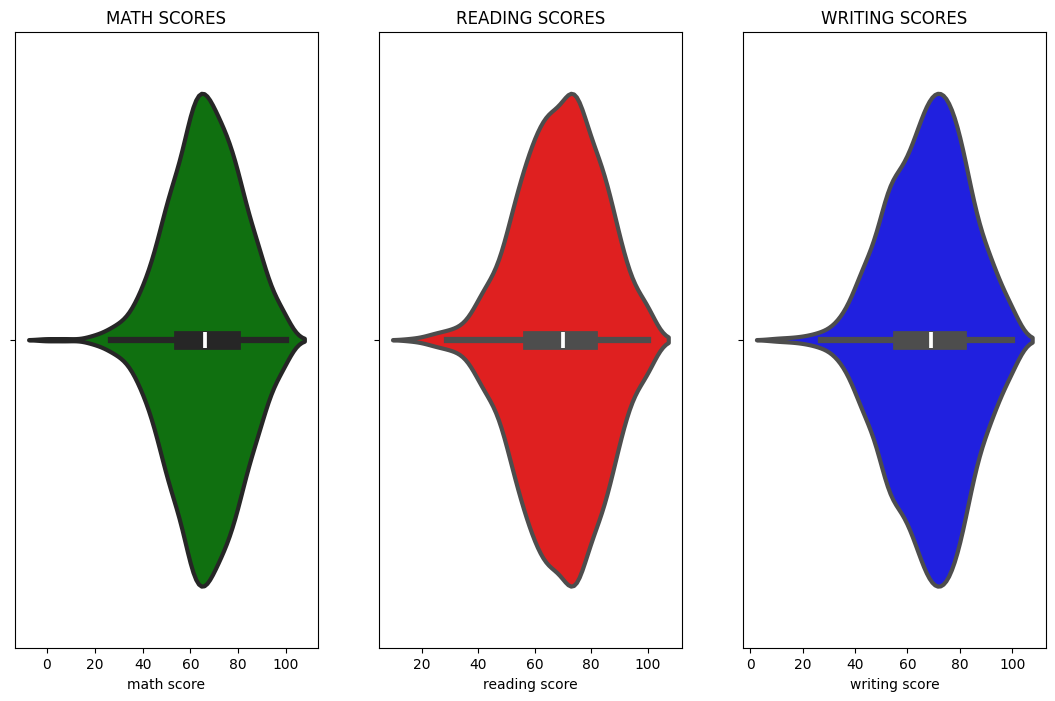

In [21]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(data=df, x='math score', color='green', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(data=df, x='reading score', color='red', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(data=df, x='writing score', color='blue', linewidth=3)

([<matplotlib.patches.Wedge at 0x2afd8b28b20>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Male'),
  Text(0.06782226650507357, -1.1980818587083752, 'Female')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

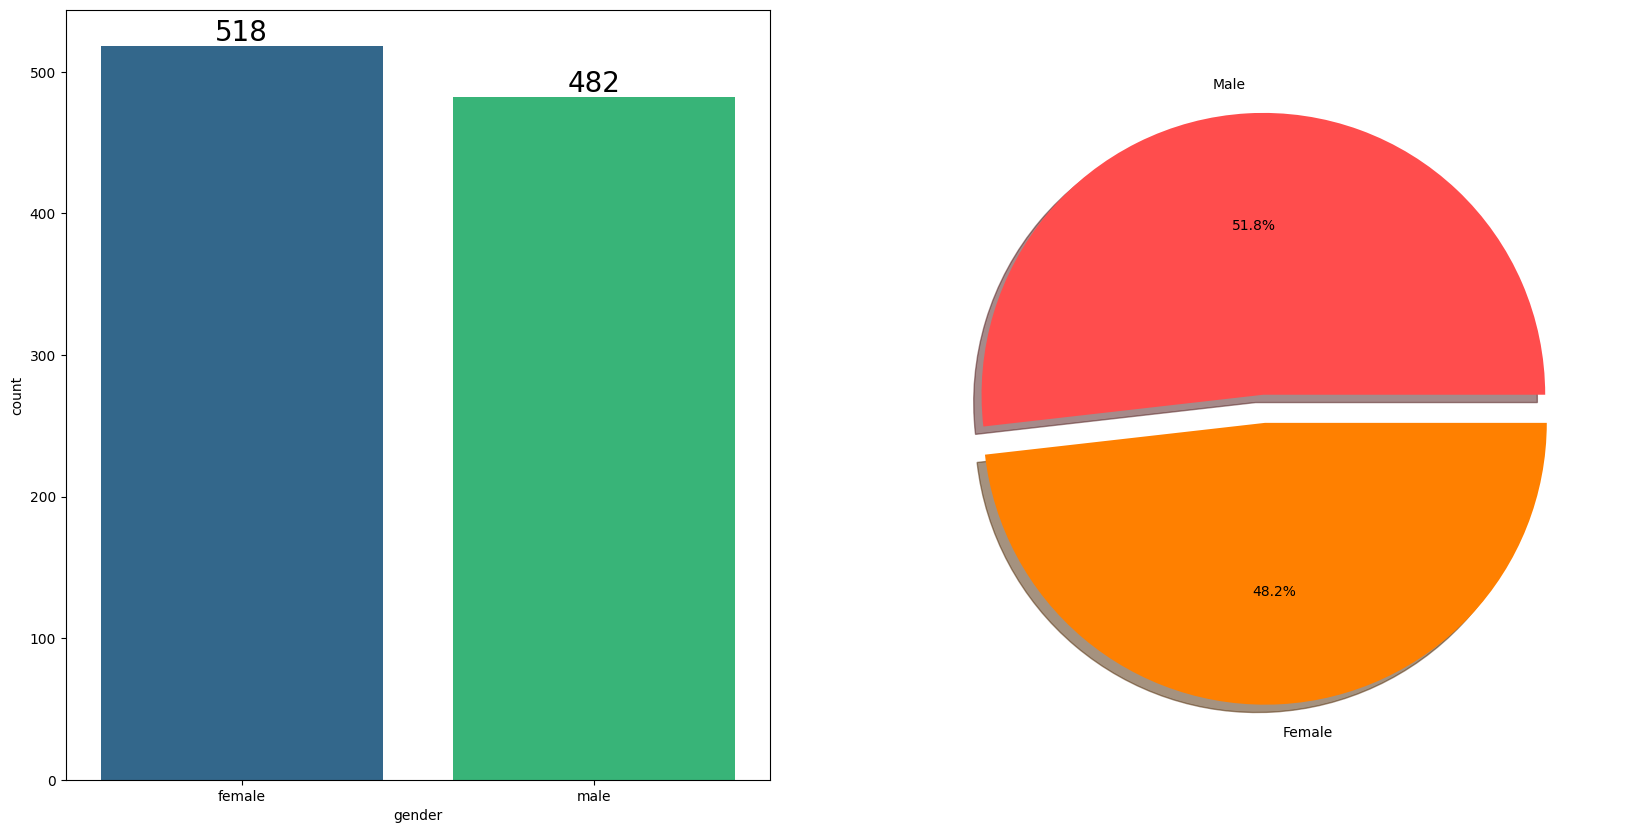

In [22]:
f,ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette='viridis', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

In [23]:
# df['gender_int'] = df['gender'].replace({'male': 0, 'female': 1})
# gender_group = df.groupby('gender_int').mean()
# gender_group

In [24]:
# plt.figure(figsize=(10, 8))

# X = ['Total Average', 'Math Average']

# female_scores = [gender_group['Average'][0], gender_group['math_score'][0]]
# male_scores = [gender_group['Average'][1], gender_group['math_score'][1]]

# X_axis = np.arange(len(X))

# plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
# plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

# plt.xticks(X_axis, X)
# plt.ylabel("Marks")
# plt.title("Total average v/s Math average marks for both of the genders", fontweight='bold')
# plt.legend()

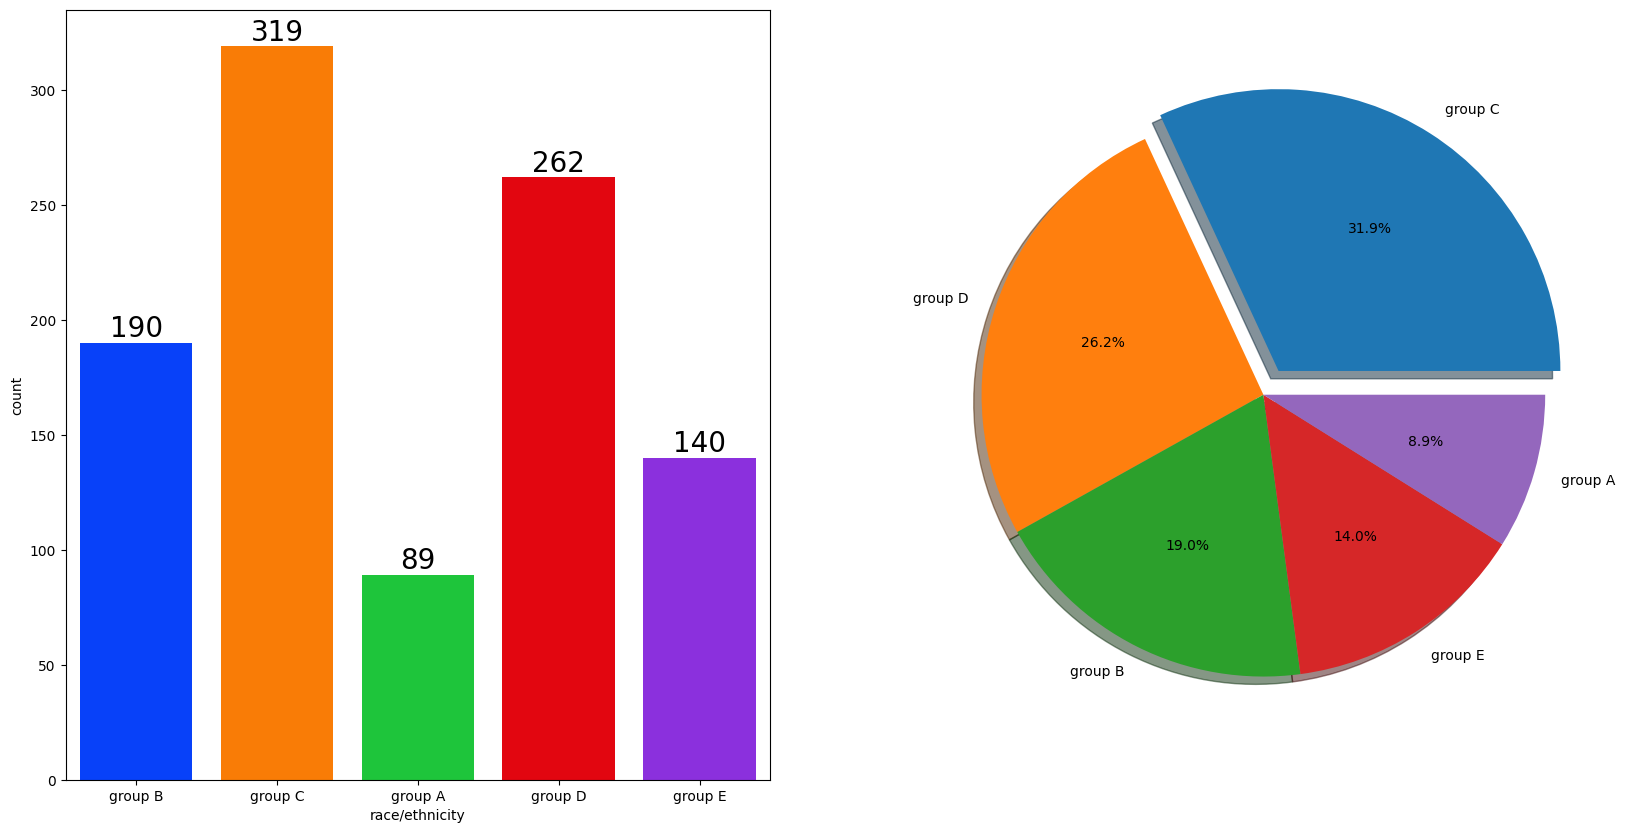

In [25]:
f, ax=plt.subplots(1,2, figsize=(20, 10))
sns.countplot(x=df['race/ethnicity'], data=df, palette = 'bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x= df['race/ethnicity']. value_counts(), labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

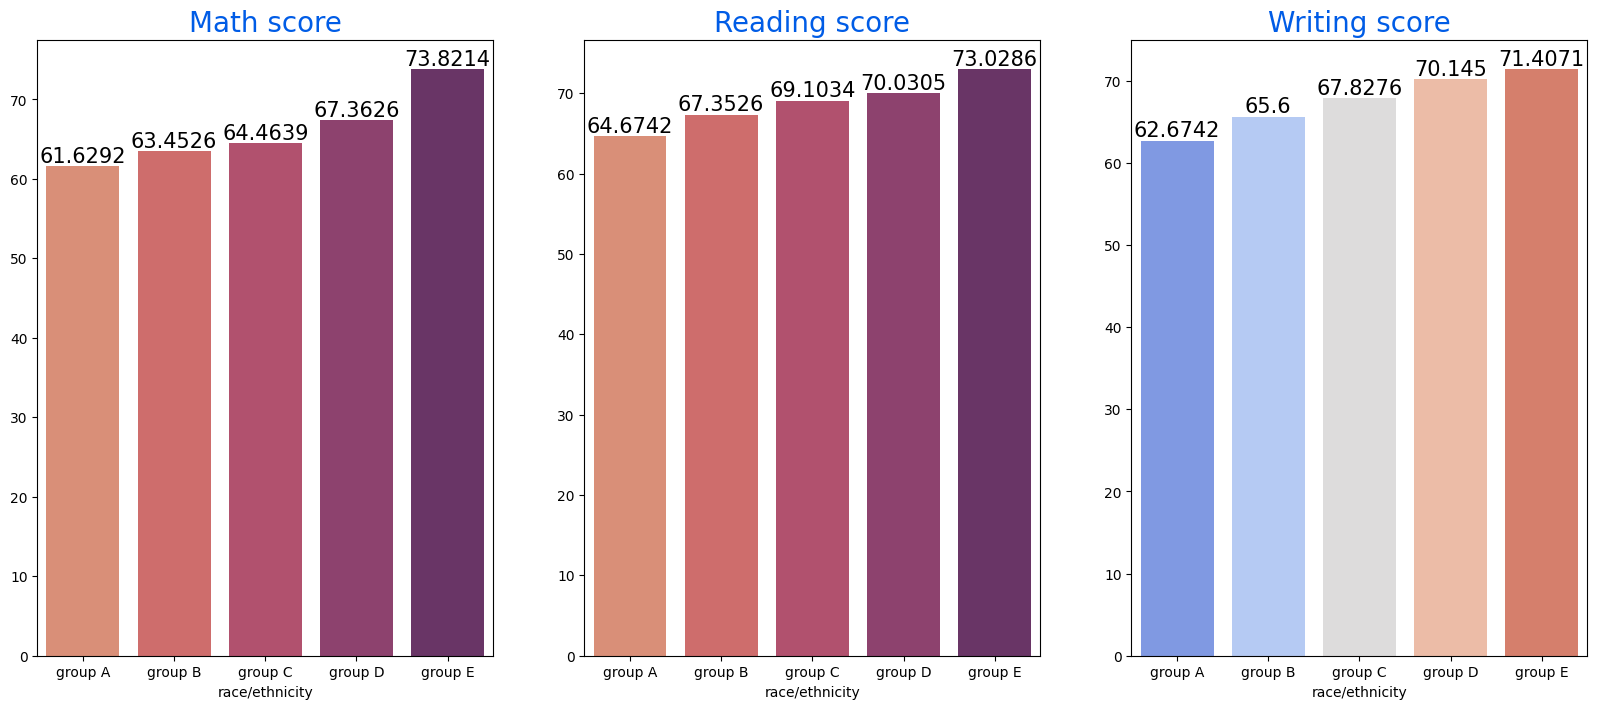

In [26]:
Group_data2=df.groupby('race/ethnicity')
f, ax= plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values,palette = 'flare',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

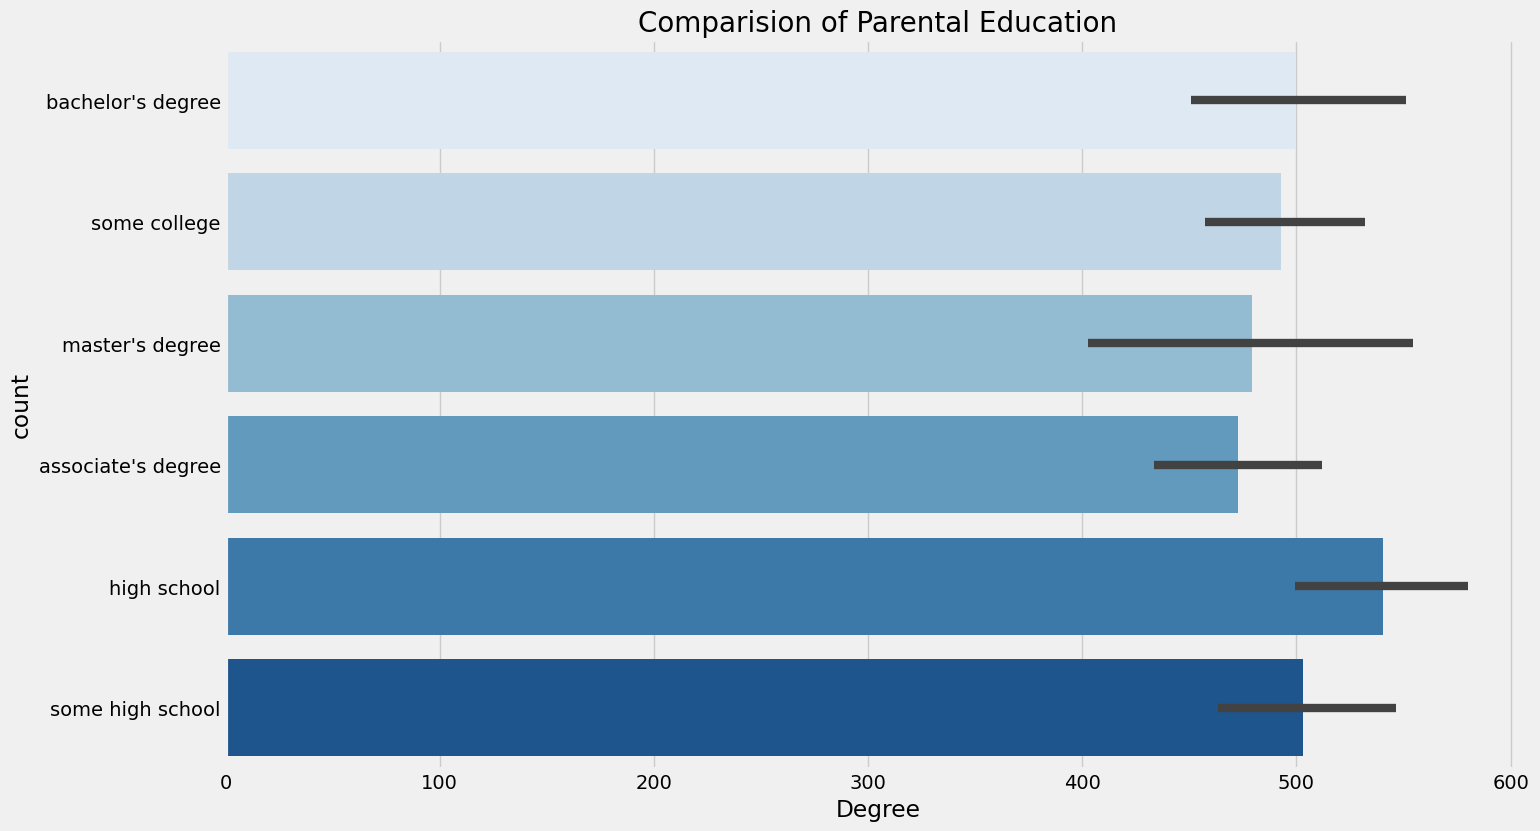

In [27]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.barplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparision of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [28]:
# df.groupby('parental level of education').agg('mean').plot(kind='barh', figsize=(10, 10))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

In [29]:
# plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('fivethirtyeight')
# sns.countplot(df['lunch'], palette = 'PuBu')
# plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
# plt.xlabel('types of lunch')
# plt.ylabel('count')
# # plt.show()

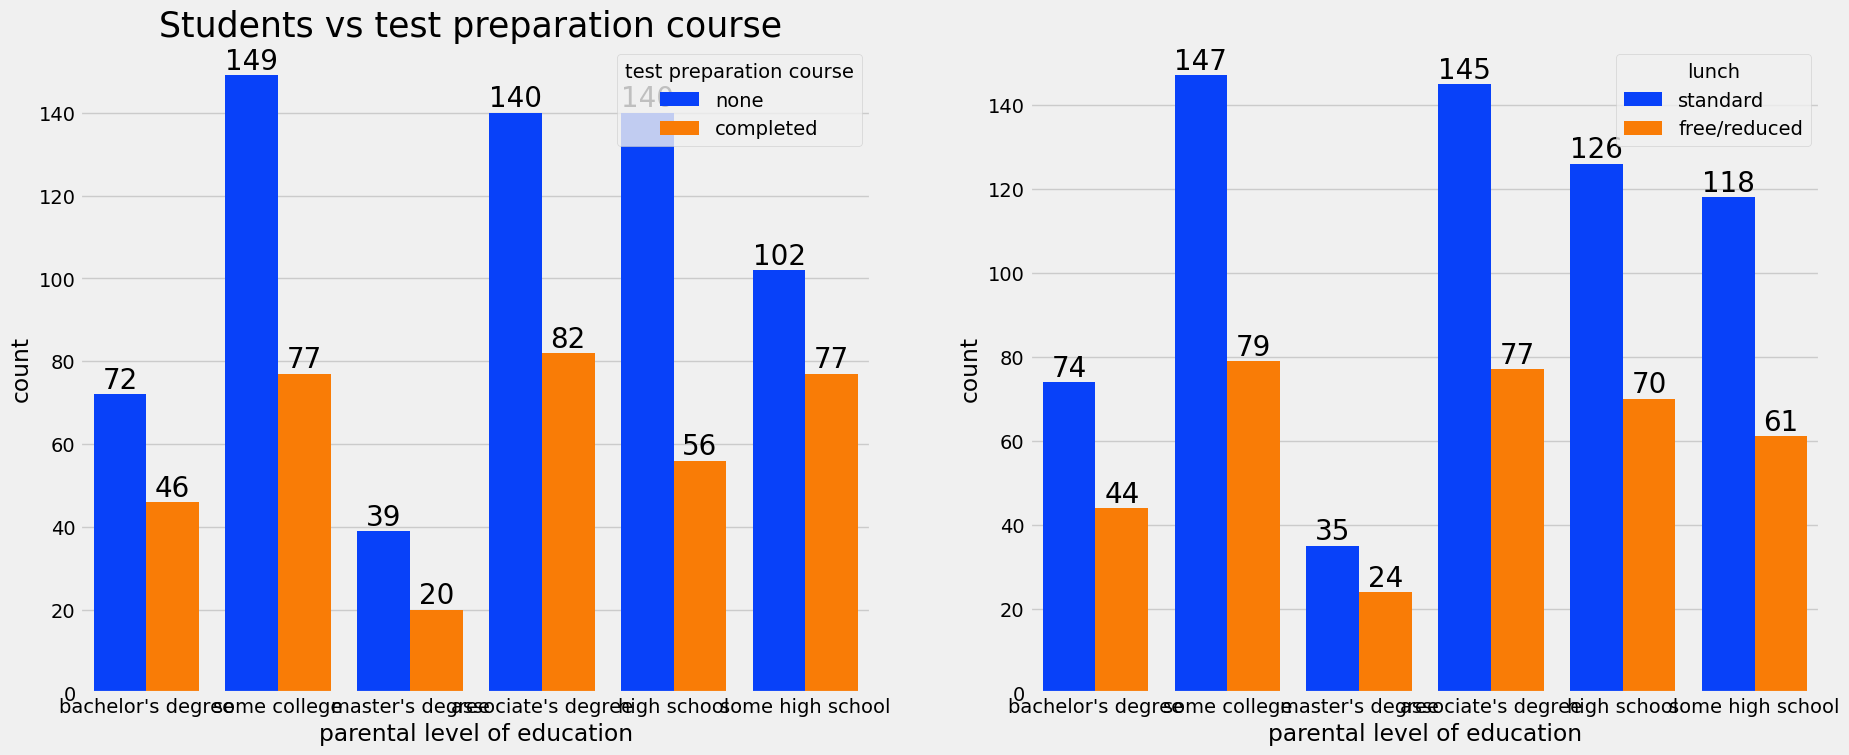

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing score'>

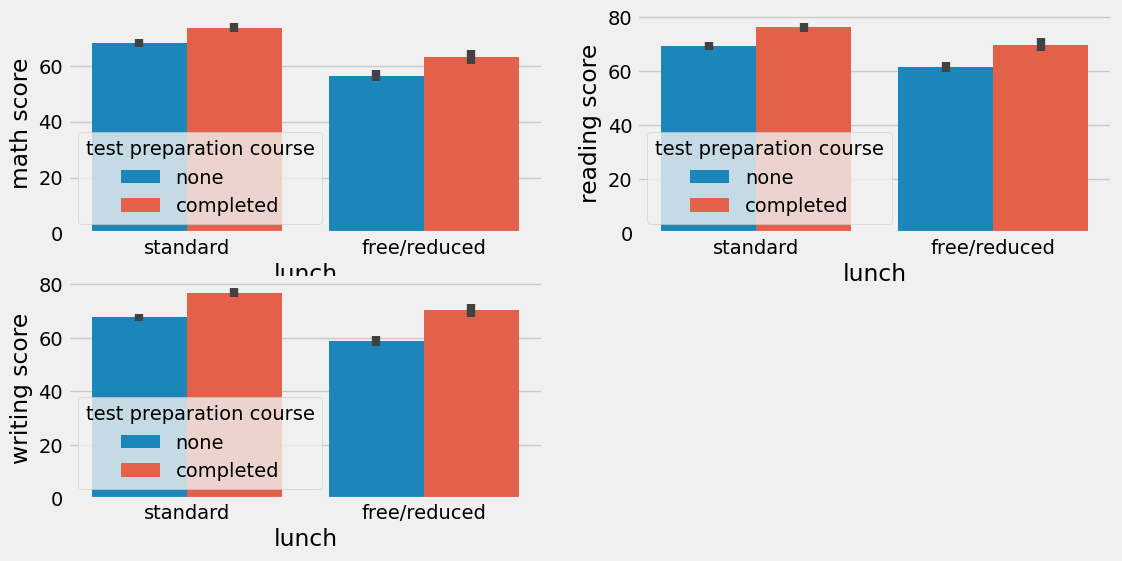

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

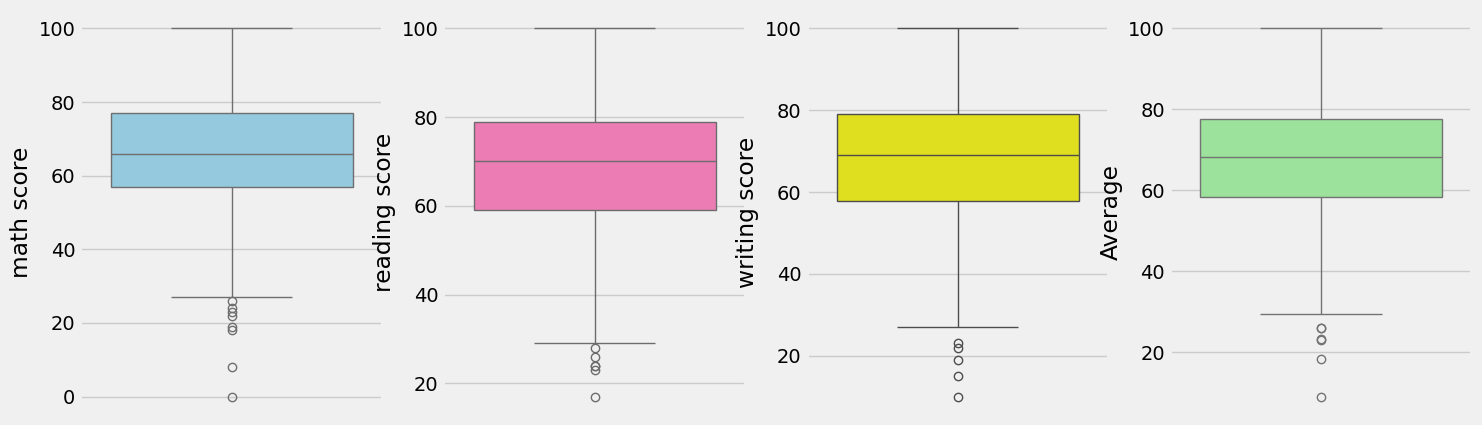

In [32]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

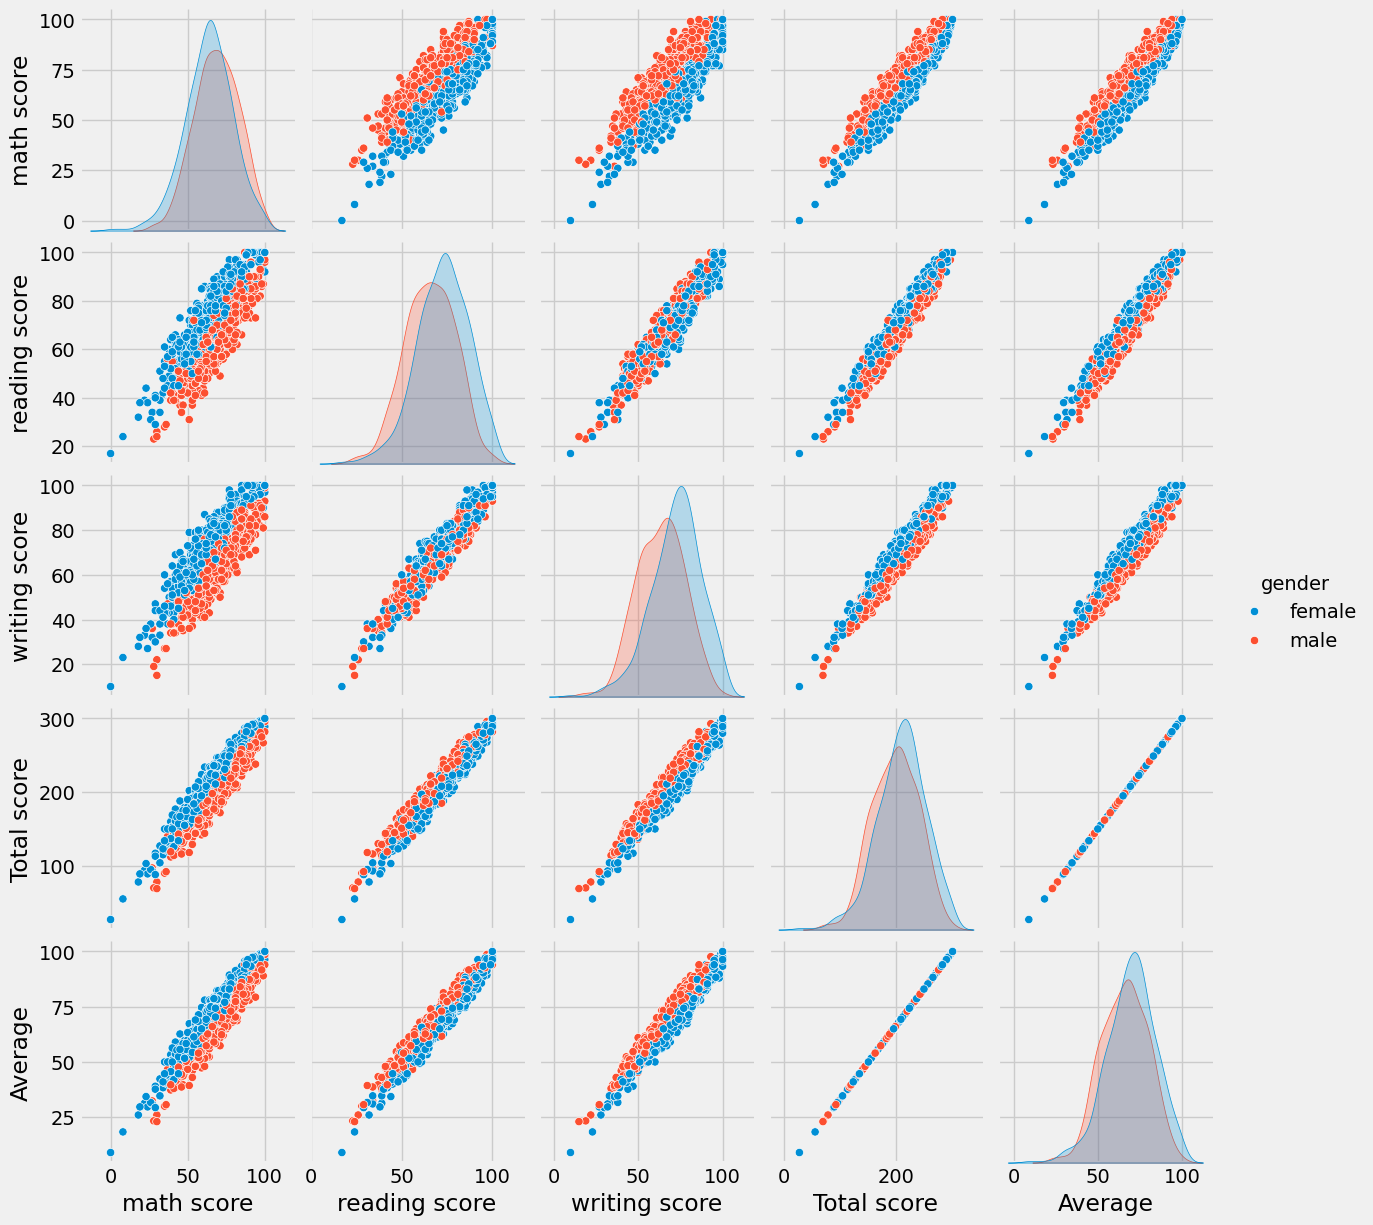

In [33]:
sns.pairplot(df,hue = 'gender')
plt.show()